In [36]:
import pymc as pm
import preliz as pz
import arviz as az 
  import matplotlib.pyplot as plt

plt.style.use('bmh') 

# Generating the Data 

In [37]:
RANDOM_SEED = 99

p_true = 0.05
N = 3000

data = pz.Bernoulli(p_true).rvs(N, random_state=RANDOM_SEED)
print(data)
print(data.sum())

print(f"Observed frequency in Group A: {data.mean()}") 

[0 0 0 ... 0 0 0]
182
Observed frequency in Group A: 0.06066666666666667


Now we build our model. Suppose we have no strong conviction about the prior.

In [38]:
with pm.Model() as model:
    p = pm.Uniform('p', lower=0, upper=1) 
    observed = pm.Bernoulli('observed', p=p, observed=data)
    inferenced_data = pm.sample(100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 12 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


array([[<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>]],
      dtype=object)

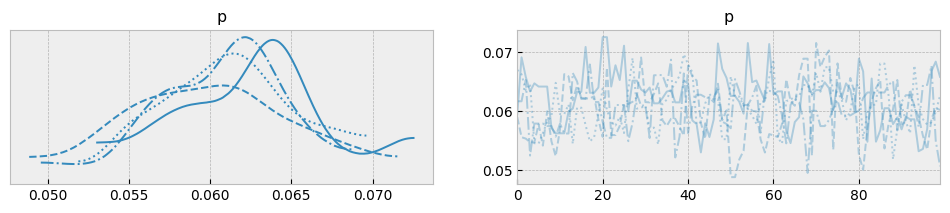

In [39]:
az.plot_trace(inferenced_data)

<Axes: title={'center': 'p'}>

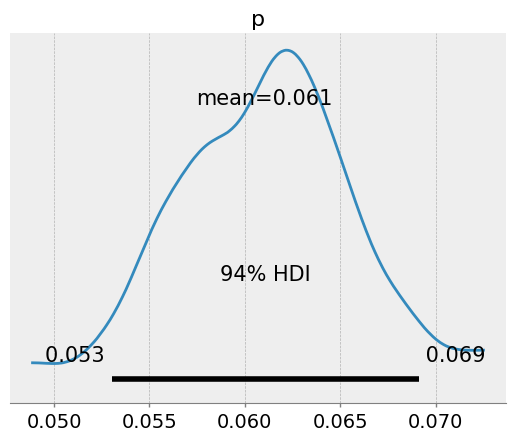

In [40]:
az.plot_posterior(inferenced_data)

# Comparing two observation datasets

## Generating the data

In [41]:
plotting_defaults = dict(
    bins=50,
    kind="hist",
    textsize=10,
)

In [42]:
true_p_A = 0.05
true_p_B = 0.04

N_A =1500
N_B =750

observations_A = pz.Bernoulli(true_p_A).rvs(N_A)
observations_B = pz.Bernoulli(true_p_B).rvs(N_B)

In [43]:
with pm.Model() as model:
    # uniform priors for the unknown parameters
    p_A = pm.Beta('p_A', alpha=1, beta=1)
    p_B = pm.Beta('p_B', alpha=1, beta=1)

    # likelihoods of observations
    obs_A = pm.Bernoulli('obs_A', p=p_A, observed=observations_A)
    obs_B = pm.Bernoulli('obs_B', p=p_B, observed=observations_B)

    # compute the difference in convertion rates
    delta = pm.Deterministic('delta', p_A - p_B)

    idata = pm.sample(2000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_A, p_B]


Output()

array([[<Axes: title={'center': 'delta'}>,
        <Axes: title={'center': 'delta'}>],
       [<Axes: title={'center': 'p_A'}>, <Axes: title={'center': 'p_A'}>],
       [<Axes: title={'center': 'p_B'}>, <Axes: title={'center': 'p_B'}>]],
      dtype=object)

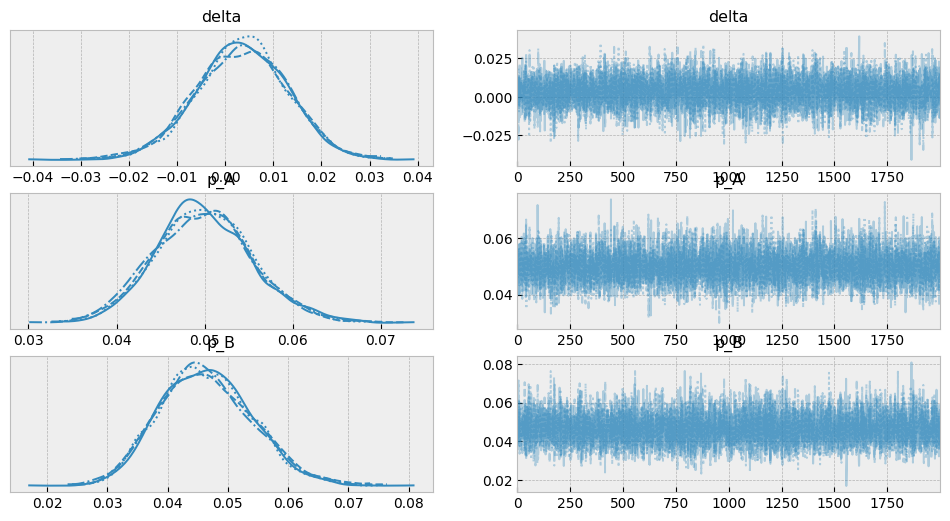

In [ ]:
az.plot_trace(idata)

In [ ]:
az.summary(idata, kind="stats")

,mean,sd,hdi_3%,hdi_97%
delta,0.003,0.010,-0.014,0.021
p_A,0.050,0.006,0.040,0.061
p_B,0.046,0.008,0.033,0.061


In [ ]:
idata.posterior["delta"]

<xarray.DataArray 'delta' (chain: 4, draw: 2000)> Size: 64kB
array([[ 0.00047503,  0.00560843,  0.00560843, ..., -0.00023493,
        -0.01378504, -0.00367921],
       [ 0.00198904,  0.01173029,  0.00133207, ...,  0.01435497,
        -0.0013252 ,  0.01309161],
       [-0.00878699,  0.01175104,  0.0022388 , ...,  0.01895699,
         0.00307032,  0.00524272],
       [-0.00688192,  0.00408391,  0.00408391, ...,  0.00054832,
         0.01403957,  0.01403957]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 16kB 0 1 2 3 4 5 6 ... 1994 1995 1996 1997 1998 1999